Q1. What is Gradient Boosting Regression?

In [2]:
Ans1="""
Gradient Boosting Regression is a powerful machine learning technique used for predictive modeling, particularly for regression 
tasks. It builds an ensemble of decision trees, where each tree corrects the errors of the previous one, in an iterative fashion.
The algorithm minimizes a loss function, typically Mean Squared Error (MSE) for regression, by sequentially adding trees that 
best reduce the residual errors of the previous model. Gradient Boosting leverages the concept of gradient descent, where it
computes gradients (derivatives) of the loss function with respect to the model's predictions and adjusts the trees accordingly
to optimize performance. This method is highly effective in capturing complex relationships in data, making it robust to 
overfitting when tuned properly, and it often outperforms other regression methods in terms of accuracy. However, it requires
careful hyperparameter tuning and can be computationally intensive for large datasets"""
Ans1

"\nGradient Boosting Regression is a powerful machine learning technique used for predictive modeling, particularly for regression \ntasks. It builds an ensemble of decision trees, where each tree corrects the errors of the previous one, in an iterative fashion.\nThe algorithm minimizes a loss function, typically Mean Squared Error (MSE) for regression, by sequentially adding trees that \nbest reduce the residual errors of the previous model. Gradient Boosting leverages the concept of gradient descent, where it\ncomputes gradients (derivatives) of the loss function with respect to the model's predictions and adjusts the trees accordingly\nto optimize performance. This method is highly effective in capturing complex relationships in data, making it robust to \noverfitting when tuned properly, and it often outperforms other regression methods in terms of accuracy. However, it requires\ncareful hyperparameter tuning and can be computationally intensive for large datasets"

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

Mean Squared Error: 0.0563
R-squared: 0.9984


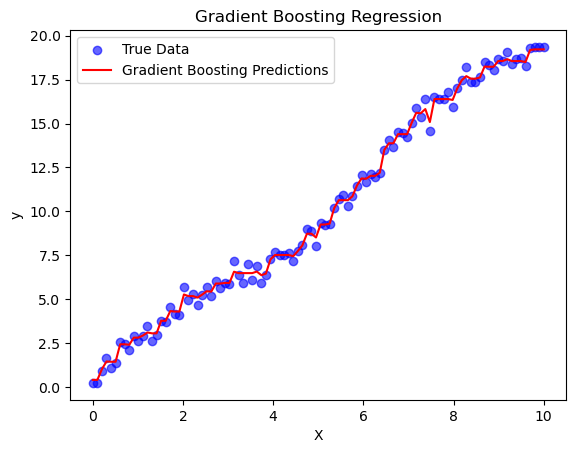

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + np.sin(X).squeeze() + np.random.normal(0, 0.5, X.shape[0])

# Gradient Boosting Regressor
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def _fit_tree(self, X, residuals):
        """Fit a decision tree to predict residuals."""
        from sklearn.tree import DecisionTreeRegressor
        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(X, residuals)
        return tree

    def fit(self, X, y):
        """Train the Gradient Boosting model."""
        self.trees = []
        # Initialize with mean prediction
        self.initial_prediction = np.mean(y)
        current_predictions = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - current_predictions
            tree = self._fit_tree(X, residuals)
            self.trees.append(tree)

            # Update predictions
            tree_prediction = tree.predict(X)
            current_predictions += self.learning_rate * tree_prediction

    def predict(self, X):
        """Make predictions using the trained model."""
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


# Train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize the predictions
plt.scatter(X, y, label="True Data", color="blue", alpha=0.6)
plt.plot(X, y_pred, label="Gradient Boosting Predictions", color="red")
plt.title("Gradient Boosting Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

Best Parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
Best MSE from Grid Search: 0.0011380864965110573
Best Parameters from Random Search: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3}
Best MSE from Random Search: 0.0018168211865180273
Grid Search -> R-squared: 1.0000, MSE: 0.0011
Random Search -> R-squared: 0.9999, MSE: 0.0018


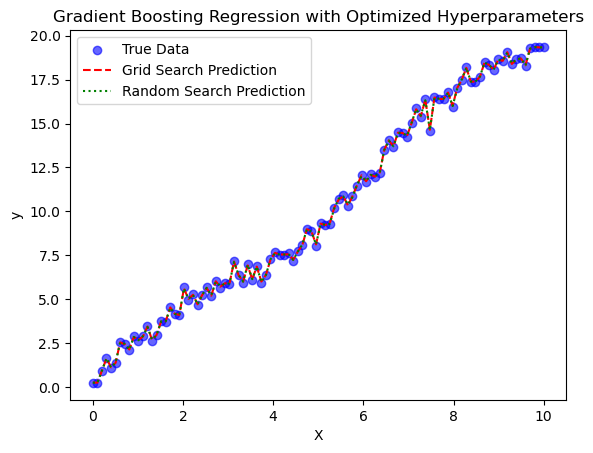

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterGrid, ParameterSampler
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + np.sin(X).squeeze() + np.random.normal(0, 0.5, X.shape[0])

# Gradient Boosting Regressor
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def _fit_tree(self, X, residuals):
        from sklearn.tree import DecisionTreeRegressor
        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(X, residuals)
        return tree

    def fit(self, X, y):
        self.trees = []
        self.initial_prediction = np.mean(y)
        current_predictions = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - current_predictions
            tree = self._fit_tree(X, residuals)
            self.trees.append(tree)
            tree_prediction = tree.predict(X)
            current_predictions += self.learning_rate * tree_prediction

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Hyperparameter tuning functions
def grid_search(model_class, param_grid, X, y):
    best_params = None
    best_mse = float('inf')
    grid = ParameterGrid(param_grid)

    for params in grid:
        model = model_class(**params)
        model.fit(X, y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_params = params

    return best_params, best_mse

def random_search(model_class, param_dist, n_iter, X, y):
    best_params = None
    best_mse = float('inf')
    sampler = ParameterSampler(param_dist, n_iter, random_state=42)

    for params in sampler:
        model = model_class(**params)
        model.fit(X, y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_params = params

    return best_params, best_mse

# Define parameter grids
param_grid = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [2, 3, 4]}
param_dist = {'n_estimators': [10, 50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'max_depth': [2, 3, 4, 5]}

# Perform grid search
best_params_grid, best_mse_grid = grid_search(GradientBoostingRegressor, param_grid, X, y)
print("Best Parameters from Grid Search:", best_params_grid)
print("Best MSE from Grid Search:", best_mse_grid)

# Perform random search
best_params_random, best_mse_random = random_search(GradientBoostingRegressor, param_dist, 10, X, y)
print("Best Parameters from Random Search:", best_params_random)
print("Best MSE from Random Search:", best_mse_random)

# Train the best models
best_model_grid = GradientBoostingRegressor(**best_params_grid)
best_model_grid.fit(X, y)
y_pred_grid = best_model_grid.predict(X)

best_model_random = GradientBoostingRegressor(**best_params_random)
best_model_random.fit(X, y)
y_pred_random = best_model_random.predict(X)

# Evaluate and compare
r2_grid = r2_score(y, y_pred_grid)
r2_random = r2_score(y, y_pred_random)

print(f"Grid Search -> R-squared: {r2_grid:.4f}, MSE: {best_mse_grid:.4f}")
print(f"Random Search -> R-squared: {r2_random:.4f}, MSE: {best_mse_random:.4f}")

# Visualization
plt.scatter(X, y, label="True Data", color="blue", alpha=0.6)
plt.plot(X, y_pred_grid, label="Grid Search Prediction", color="red", linestyle='--')
plt.plot(X, y_pred_random, label="Random Search Prediction", color="green", linestyle=':')
plt.title("Gradient Boosting Regression with Optimized Hyperparameters")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Q4. What is a weak learner in Gradient Boosting?

In [5]:
Ans4="""A weak learner in Gradient Boosting is a simple predictive model that performs only slightly better than random guessing.
These models, typically shallow decision trees with limited depth (e.g., 1-3 levels), are deliberately constrained in their
complexity to ensure they remain simple and interpretable. Weak learners on their own have high bias and limited predictive
power, meaning they may not capture intricate patterns in the data. However, in Gradient Boosting, they play a crucial role by 
iteratively correcting the residual errors of the ensemble built so far. This sequential approach, where each weak learner 
focuses on minimizing the errors left by its predecessors, allows Gradient Boosting to build a strong and accurate model from a
series of simple components. The use of weak learners also helps prevent overfitting, as their simplicity ensures that the 
model generalizes well to unseen data. Moreover, their computational efficiency makes them ideal for iterative ensemble 
techniques, enabling Gradient Boosting to tackle complex problems effectively."""
Ans4

'A weak learner in Gradient Boosting is a simple predictive model that performs only slightly better than random guessing.\nThese models, typically shallow decision trees with limited depth (e.g., 1-3 levels), are deliberately constrained in their\ncomplexity to ensure they remain simple and interpretable. Weak learners on their own have high bias and limited predictive\npower, meaning they may not capture intricate patterns in the data. However, in Gradient Boosting, they play a crucial role by \niteratively correcting the residual errors of the ensemble built so far. This sequential approach, where each weak learner \nfocuses on minimizing the errors left by its predecessors, allows Gradient Boosting to build a strong and accurate model from a\nseries of simple components. The use of weak learners also helps prevent overfitting, as their simplicity ensures that the \nmodel generalizes well to unseen data. Moreover, their computational efficiency makes them ideal for iterative ensembl

Q5. What is the intuition behind the Gradient Boosting algorithm?

In [6]:
Ans5="""The intuition behind the Gradient Boosting algorithm is to build a strong predictive model by combining multiple weak 
learners in a sequential manner, focusing on correcting the errors of previous models. The process begins with a simple initial
model, often predicting a baseline value like the mean for regression or uniform probabilities for classification. The
algorithm then calculates the residuals, which are the differences between the actual values and the predictions, representing 
the errors that need to be addressed. In each iteration, a new weak learner, typically a shallow decision tree, is trained to 
predict these residuals. By adding the predictions of the new learner to the existing model, the overall error is reduced. This
process is akin to gradient descent, where each learner moves the model closer to minimizing the loss function by addressing
errors step by step. The model is built additively, with a learning rate controlling the contribution of each learner, ensuring 
gradual and stable improvement. Over iterations, the ensemble becomes increasingly accurate, systematically refining its 
predictions to capture complex patterns in the data. This iterative approach allows Gradient Boosting to effectively learn from
data, making it a powerful method for regression and classification tasks."""
Ans5

'The intuition behind the Gradient Boosting algorithm is to build a strong predictive model by combining multiple weak \nlearners in a sequential manner, focusing on correcting the errors of previous models. The process begins with a simple initial\nmodel, often predicting a baseline value like the mean for regression or uniform probabilities for classification. The\nalgorithm then calculates the residuals, which are the differences between the actual values and the predictions, representing \nthe errors that need to be addressed. In each iteration, a new weak learner, typically a shallow decision tree, is trained to \npredict these residuals. By adding the predictions of the new learner to the existing model, the overall error is reduced. This\nprocess is akin to gradient descent, where each learner moves the model closer to minimizing the loss function by addressing\nerrors step by step. The model is built additively, with a learning rate controlling the contribution of each learner,

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

In [7]:
Ans6="""The Gradient Boosting algorithm builds an ensemble of weak learners by iteratively adding models that correct the errors
of the combined predictions made so far. It begins with an initial model, often a simple predictor like the mean for regression
or uniform probabilities for classification. In each iteration, a new weak learner, typically a shallow decision tree, is 
trained to model the residuals—the differences between the actual target values and the current predictions of the ensemble. 
This residual represents the portion of the data that the current model has failed to explain. The predictions from the weak 
learner are then scaled by a learning rate, which controls how much influence the new learner has on the ensemble. These scaled
predictions are added to the existing ensemble's output, gradually improving its overall accuracy. By sequentially training
weak learners to address errors in this way, Gradient Boosting creates a strong model that captures complex patterns in the
data while reducing errors at each step. This additive process ensures that each weak learner contributes incrementally to 
refining the ensemble's predictions.
"""
Ans6

"The Gradient Boosting algorithm builds an ensemble of weak learners by iteratively adding models that correct the errors\nof the combined predictions made so far. It begins with an initial model, often a simple predictor like the mean for regression\nor uniform probabilities for classification. In each iteration, a new weak learner, typically a shallow decision tree, is \ntrained to model the residuals—the differences between the actual target values and the current predictions of the ensemble. \nThis residual represents the portion of the data that the current model has failed to explain. The predictions from the weak \nlearner are then scaled by a learning rate, which controls how much influence the new learner has on the ensemble. These scaled\npredictions are added to the existing ensemble's output, gradually improving its overall accuracy. By sequentially training\nweak learners to address errors in this way, Gradient Boosting creates a strong model that captures complex patterns

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

In [8]:
Ans7="""Constructing the mathematical intuition of the Gradient Boosting algorithm involves several key steps. First, the
process begins by defining a loss function that quantifies the difference between the predicted values and the actual target
values. This loss function serves as the optimization objective, guiding the algorithm's improvements. Initially, a simple
model, such as the mean of the target values for regression, is chosen as the baseline predictor. In subsequent steps, the 
algorithm calculates the negative gradient of the loss function with respect to the current predictions, which represents the 
direction of maximum reduction in error. This gradient is treated as the residual, or the error that needs to be minimized.
A new weak learner, typically a shallow decision tree, is then trained to predict this gradient or residual. The predictions of
this weak learner are scaled by a learning rate to control the contribution of each learner, and added to the ensemble's
output. This process of calculating the gradient, training a weak learner, and updating the model is repeated iteratively.
Over iterations, the ensemble's predictions converge towards minimizing the loss function, resulting in a strong predictive 
model. The mathematical foundation, rooted in gradient descent and additive modeling, enables Gradient Boosting to effectively
capture complex relationships in the data."""
Ans7

"Constructing the mathematical intuition of the Gradient Boosting algorithm involves several key steps. First, the\nprocess begins by defining a loss function that quantifies the difference between the predicted values and the actual target\nvalues. This loss function serves as the optimization objective, guiding the algorithm's improvements. Initially, a simple\nmodel, such as the mean of the target values for regression, is chosen as the baseline predictor. In subsequent steps, the \nalgorithm calculates the negative gradient of the loss function with respect to the current predictions, which represents the \ndirection of maximum reduction in error. This gradient is treated as the residual, or the error that needs to be minimized.\nA new weak learner, typically a shallow decision tree, is then trained to predict this gradient or residual. The predictions of\nthis weak learner are scaled by a learning rate to control the contribution of each learner, and added to the ensemble's\noutpu